In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import glob

In [3]:
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch
from fastai.callbacks.hooks import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_DIR = '/content/drive/MyDrive/dock2/'
#/content/drive/MyDrive/dock2/TRAIN/cruise_ship
train_folder = BASE_DIR+'TRAIN/'
files_in_train = sorted(os.listdir(train_folder))
files_in_annotated = []
df = pd.DataFrame()
df = pd.DataFrame(columns=['labels','images'])
for i in files_in_train:
  print (i)
  train_annotation = train_folder + str(i)
  files_in_annotated = os.listdir(train_annotation)
  print(files_in_annotated)
#images=[i for i in files_in_train if i in files_in_annotated]
#df = pd.DataFrame()
#for i in files_in_train:
  #for j in files_in_annotated:
    #df = DataFrame(j,columns=['images'])
#pd.to_csv('files_path.csv', header=None)

In [ ]:
path = '/content/drive/MyDrive/dock2/TRAIN/cruise_ship'
path1 = '/content/drive/MyDrive/dock2/TRAIN/Train'
k = 54
for filename in os.listdir(path):
  print(os.path.join(path, str(k)+'.jpg'))
  os.rename(os.path.join(path,filename), os.path.join(path1, str(k)+'.jpg'))
  k = k+1

/content/drive/MyDrive/dock2/TRAIN/cruise_ship/54.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/55.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/56.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/57.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/58.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/59.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/60.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/61.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/62.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/63.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/64.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/65.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/66.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/67.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/68.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/69.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/70.jpg
/content/drive/MyDrive/dock2/TRAIN/cruise_ship/71.jpg
/content/drive/MyDrive/dock2

In [5]:
path ='/content/drive/MyDrive/dock2/TotalTrain'
testpath = '/content/drive/MyDrive/dock2/TEST'
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0,do_flip=False,xtra_tfms=[cutout()])
data = (ImageList.from_csv(path, csv_name = '/content/drive/MyDrive/dock2/TRAIN/train.csv')
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '/content/drive/MyDrive/dock2/TEST')              
        .transform(tfms, size=400)
        .databunch(num_workers=0,bs=8))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
val=data.classes
print(val)

['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

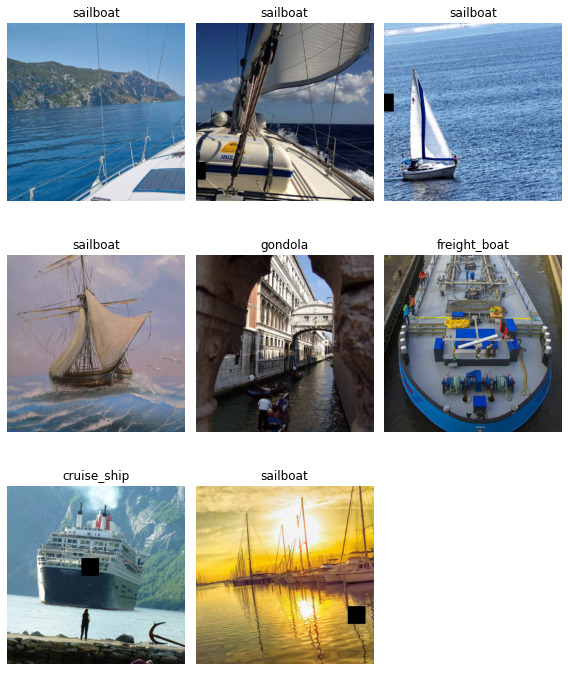

In [ ]:
data.show_batch(rows=3, figsize=(8,10))


In [6]:
import torchvision.models as models
resnext50_32x4d = models.resnext50_32x4d()
wide_resnet50_2 = models.wide_resnet50_2()
mnasnet = models.mnasnet1_0()

In [7]:
import torchvision.models as models
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
mnasnet = models.mnasnet1_0(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth


Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth


Downloading: "https://download.pytorch.org/models/mnasnet1.0_top1_73.512-f206786ef8.pth" to /root/.cache/torch/hub/checkpoints/mnasnet1.0_top1_73.512-f206786ef8.pth


In [10]:
from fastai import *
from fastai.vision import *
from sklearn.model_selection import StratifiedKFold
from pathlib import Path
import shutil
from sklearn.metrics import f1_score, confusion_matrix

np.random.seed(1786)

In [9]:
ROOT = "/content/drive/MyDrive/dock2/"

In [11]:
k = "/content/drive/MyDrive/dock2/TRAIN/train.csv"
p = "/content/drive/MyDrive/dock2/test.csv"

In [12]:
def read_data(root):
    train_df = pd.read_csv(k)
    test_df = pd.read_csv(p)
    return train_df, test_df

In [13]:
class SaveBestModel(Recorder):
    def __init__(self, learn,name='best_model'):
        super().__init__(learn)
        self.name = name
        self.best_loss = None
        self.best_acc = None
        self.save_method = self.save_when_acc
        
    def save_when_acc(self, metrics):        
        loss, acc = metrics[0], metrics[1]
        if (self.best_acc is None) or (acc > self.best_acc) or (loss < self.best_loss):
            self.best_acc = acc
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Save the best acc {:.5f}".format(self.best_acc))
        elif acc == self.best_acc and  loss < self.best_loss:
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Acc is eq,Save the lower loss {:.5f}".format(self.best_loss))
            
    def on_epoch_end(self,last_metrics=MetricsList,**kwargs:Any):
        self.save_method(last_metrics)

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
train_df, test_df = read_data(ROOT)

In [16]:
#Path(ROOT).mkdir(exist_ok=True, parents=True)
# src1 = "/kaggle/input/dataset/"
# shutil.copytree(src1, ROOT)


if __name__=="__main__":
    train_df, test_df = read_data(ROOT)
    print(train_df.shape, test_df.shape)
    
    cvlist = list(StratifiedKFold(10, random_state=12345786).split(train_df, train_df.target))
    
    tfms1 = get_transforms(max_zoom=1.5)
    test_preds_all = []
    val_preds_all = []
    for i in range(5):
        print("Starting fold {}..".format(i))
        tr_idx, val_idx = cvlist[i]
        print(tr_idx.shape, val_idx.shape)
        src = (ImageList.from_df(train_df, path=ROOT, folder="TotalTrain").split_by_idxs(tr_idx, val_idx)
                                                            .label_from_df())
        data = ImageDataBunch.create_from_ll(src, ds_tfms=tfms1, size=224, bs=32, resize_method=3).normalize(imagenet_stats)
        data.add_test(ImageList.from_df(test_df, path=ROOT, folder="TEST"))
        learn = cnn_learner(data, models.densenet121, metrics=accuracy, ps=0.5)
        cb = SaveBestModel(learn, name="bestmodel_{}".format(i))       
        learn.fit_one_cycle(10)
        learn.unfreeze()
       
        learn.fit_one_cycle(10, max_lr=1e-4, callbacks=[cb])
       
        learn.fit_one_cycle(10, max_lr=5e-5, callbacks=[cb])
      
        learn.fit_one_cycle(10, max_lr=1e-5, callbacks=[cb])
        
        learn.fit_one_cycle(10, max_lr=5e-6, callbacks=[cb])
        
        learn.fit_one_cycle(7, max_lr=1e-6, callbacks=[cb])
        learn.load("bestmodel_{}".format(i))
        val_preds, y = learn.TTA(ds_type=DatasetType.Valid)
        val_preds = np.exp(val_preds.numpy())
        print("F1 score for this fold ",f1_score(y.numpy(), np.argmax(val_preds,axis=1), average='weighted'))
        test_preds = np.exp(learn.TTA(ds_type=DatasetType.Test)[0].numpy())
        test_preds_all.append(test_preds)
        val_preds_all.append(val_preds)
        fname = "bestmodel_{}.pth".format(i)
        src = str(Path(ROOT) / "models" / fname)
        shutil.copy(src, fname)
    test_preds_all = np.mean(test_preds_all, axis=0)
    val_preds_all = np.concatenate(val_preds_all, axis=0)

    np.save("test_preds.npy", test_preds_all)
    np.save("val_preds.npy", val_preds_all)

(1162, 2) (300, 1)
Starting fold 0..
(1045,) (117,)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.043104,0.659766,0.786325,03:09
1,1.233648,0.368245,0.863248,00:46
2,0.823538,0.380195,0.863248,00:44
3,0.603520,0.430539,0.888889,00:44
4,0.501334,0.397617,0.897436,00:44
5,0.365409,0.331202,0.905983,00:44
6,0.246153,0.363767,0.905983,00:44
7,0.201037,0.347631,0.914530,00:44
8,0.161160,0.332751,0.914530,00:44
9,0.138144,0.322237,0.914530,00:44


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.091344,0.319398,0.914530,00:45
1,0.105715,0.332796,0.905983,00:44
2,0.118825,0.330199,0.905983,00:44
3,0.132070,0.505017,0.888889,00:45
4,0.116320,0.337970,0.923077,00:45
5,0.112965,0.372154,0.914530,00:45
6,0.094722,0.329086,0.940171,00:45
7,0.082383,0.333493,0.940171,00:45
8,0.068582,0.317441,0.940171,00:44


Save the best acc 0.91453
Save the best acc 0.92308
Save the best acc 0.94017
Save the best acc 0.94017


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.056614,0.345214,0.923077,00:44
1,0.041738,0.332157,0.940171,00:44
2,0.035694,0.319003,0.923077,00:44
3,0.042910,0.354480,0.914530,00:44
4,0.050124,0.356610,0.905983,00:45
5,0.044296,0.349028,0.905983,00:45
6,0.037043,0.323645,0.914530,00:45
7,0.031996,0.330082,0.914530,00:45
8,0.030712,0.321717,0.923077,00:45


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.038355,0.316424,0.914530,00:45
1,0.048847,0.314311,0.923077,00:45
2,0.036735,0.299005,0.923077,00:46
3,0.033983,0.293991,0.931624,00:45
4,0.037156,0.310439,0.914530,00:45
5,0.026779,0.311115,0.914530,00:45
6,0.026018,0.297051,0.931624,00:45
7,0.026665,0.293956,0.923077,00:45
8,0.024700,0.295700,0.931624,00:45


Save the best acc 0.91453
Save the best acc 0.92308
Save the best acc 0.92308
Save the best acc 0.93162
Save the best acc 0.92308
Save the best acc 0.93162


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.019332,0.305435,0.914530,00:45
1,0.020219,0.300046,0.923077,00:45
2,0.018344,0.292192,0.923077,00:45
3,0.016458,0.300251,0.931624,00:46
4,0.017180,0.303366,0.923077,00:45
5,0.018474,0.305846,0.923077,00:45
6,0.015886,0.301706,0.923077,00:45
7,0.014073,0.294203,0.931624,00:45
8,0.016911,0.301676,0.914530,00:45


Save the best acc 0.92308
Save the best acc 0.93162
Save the best acc 0.93162


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.016034,0.297645,0.914530,00:45
1,0.017724,0.288478,0.923077,00:45
2,0.017546,0.297896,0.923077,00:46
3,0.020035,0.286007,0.923077,00:45
4,0.019213,0.305009,0.923077,00:46
5,0.018175,0.307862,0.914530,00:45
6,0.019856,0.290828,0.931624,00:45


Save the best acc 0.92308
Save the best acc 0.92308
Save the best acc 0.93162


F1 score for this fold  0.913212615851132


In [17]:
sub = test_df[["Image"]]
sub["target"] = np.argmax(test_preds, axis=1)
sub.to_csv("dense00.csv", index=False)